# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latlngCity = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    latlngCity.append(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

  
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
city_count = len(cities)
base_url = "http://api.openweathermap.org/data/2.5/weather?"
i=0
f = open(output_data_file, "w+")
fr = csv.writer(f)
#found_city_count = 0
#not_found_city_c = 0
header = ['City','Cloudiness','Country','Date','Humidity','Lat', 'Lon', 'Max Temp', 'Wind Speed']
fr.writerow(header)
for i in range(city_count) :
    city = cities[i]
    city_data = []

    # Build query URL
    query_url = base_url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    if weather_json['cod'] == '404' :
        print(f'Error!!! Processing City : {city} , not found \n {query_url}')
    else :        
        city_ID = weather_json['id']
        print(f'Processed City : {city} , city ID: {city_ID} \n {query_url} ')

        #writing into csv file
        city_data.append(weather_json['name'])
        city_data.append(weather_json['clouds']['all'])
        city_data.append(weather_json['sys']['country'])
        city_data.append(weather_json['dt'])
        city_data.append(weather_json['main']['humidity'])
        city_data.append(weather_json['coord']['lat'])
        city_data.append(weather_json['coord']['lon'])
        city_data.append(weather_json['main']['temp'])
        city_data.append(weather_json['wind']['speed'])
    
        print(city_data)
        fr.writerow(city_data)
f.close()  



Processed City : busselton , city ID: 2075265 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=busselton 
['Busselton', 80, 'AU', 1553726721, 58, -33.64, 115.35, 285.19, 4.91]
Processed City : khatanga , city ID: 2022572 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=khatanga 
['Khatanga', 48, 'RU', 1553726987, 79, 71.98, 102.47, 264.747, 5.71]
Processed City : new norfolk , city ID: 2155415 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=new norfolk 
['New Norfolk', 20, 'AU', 1553726955, 67, -42.78, 147.06, 287.61, 6.2]
Processed City : east london , city ID: 1006984 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=east london 
['East London', 0, 'ZA', 1553727005, 99, -33.02, 27.91, 296.922, 4.06]
Processed City : bambous virieux , city ID: 1106677 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c

Processed City : lazaro cardenas , city ID: 3996234 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lazaro cardenas 
['Lazaro Cardenas', 90, 'MX', 1553727008, 16, 28.39, -105.62, 302.58, 6.7]
Processed City : puri , city ID: 1635111 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=puri 
['Puri', 20, 'ID', 1553724000, 100, -7.54, 112.45, 299.15, 1.5]
Error!!! Processing City : barentsburg , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=barentsburg
Processed City : hithadhoo , city ID: 1282256 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hithadhoo 
['Hithadhoo', 56, 'MV', 1553726817, 100, -0.6, 73.08, 299.972, 0.76]
Processed City : makakilo city , city ID: 5850554 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=makakilo city 
['Makakilo City', 1, 'US', 1553726980, 65

Error!!! Processing City : grand river south east , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=grand river south east
Processed City : atar , city ID: 2381334 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=atar 
['Atar', 0, 'MR', 1553727037, 42, 20.52, -13.05, 287.172, 1.41]
Processed City : nuristan , city ID: 1346493 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=nuristan 
['Nuristan', 40, 'UZ', 1553724000, 100, 38.49, 65.64, 285.15, 2.1]
Processed City : kaitangata , city ID: 2208248 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kaitangata 
['Kaitangata', 0, 'NZ', 1553726736, 60, -46.28, 169.85, 289.26, 2.24]
Processed City : opuwo , city ID: 3354077 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=opuwo 
['Opuwo', 0, 'NA', 1553726851, 82, -18.06, 13.84, 288.

Processed City : frontignan , city ID: 3016956 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=frontignan 
['Frontignan', 0, 'FR', 1553726829, 53, 43.45, 3.75, 281.63, 3.1]
Processed City : betong , city ID: 1611635 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=betong 
['Betong', 8, 'MY', 1553727051, 92, 5.77, 101.07, 294.722, 1.16]
Processed City : pirovskoye , city ID: 1494941 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pirovskoye 
['Pirovskoye', 0, 'RU', 1553727052, 71, 57.63, 92.27, 262.472, 1.41]
Processed City : svetlogorsk , city ID: 584051 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=svetlogorsk 
['Svetlogorsk', 90, 'RU', 1553724000, 100, 53.14, 59.15, 266.15, 2]
Processed City : homer , city ID: 5864145 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=homer 
['Ho

Processed City : pevek , city ID: 2122090 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pevek 
['Pevek', 88, 'RU', 1553727064, 93, 69.7, 170.27, 261.847, 9.56]
Processed City : butaritari , city ID: 2110227 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=butaritari 
['Butaritari', 36, 'KI', 1553726842, 98, 3.07, 172.79, 302.472, 8.71]
Processed City : vaini , city ID: 1273574 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vaini 
['Vaini', 0, 'IN', 1553727065, 90, 15.34, 74.49, 292.372, 0.61]
Processed City : bartica , city ID: 3379507 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bartica 
['Bartica', 40, 'GY', 1553724000, 69, 6.41, -58.62, 301.15, 5.1]
Processed City : turukhansk , city ID: 1488903 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=turukhansk 
['Turukhansk', 92

Processed City : bakel , city ID: 2252606 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bakel 
['Bakel', 0, 'SN', 1553727078, 38, 14.9, -12.46, 300.772, 4.66]
Processed City : terrace , city ID: 6162949 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=terrace 
['Terrace', 20, 'CA', 1553724000, 33, 54.52, -128.61, 288.15, 4.1]
Processed City : coihaique , city ID: 3894426 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=coihaique 
['Coihaique', 0, 'CL', 1553724000, 32, -45.58, -72.07, 294.15, 2.1]
Processed City : warri , city ID: 2319133 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=warri 
['Warri', 12, 'NG', 1553727079, 83, 5.52, 5.75, 299.597, 3.31]
Processed City : bodden town , city ID: 3580733 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bodden town 
['Bodden Town', 20,

Processed City : dicabisagan , city ID: 1715015 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dicabisagan 
['Dicabisagan', 12, 'PH', 1553727092, 96, 17.08, 122.42, 298.447, 1.66]
Processed City : mackay , city ID: 5921525 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mackay 
['Mackay', 90, 'CA', 1553724780, 69, 53.65, -115.58, 277.15, 4.6]
Processed City : mayo , city ID: 6068416 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mayo 
['Mayo', 90, 'CA', 1553724000, 39, 63.59, -135.9, 281.15, 2.6]
Processed City : longyearbyen , city ID: 2729907 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=longyearbyen 
['Longyearbyen', 40, 'NO', 1553723400, 62, 78.22, 15.63, 267.15, 2.6]
Processed City : diapaga , city ID: 2361373 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=diapaga 
['Di

Processed City : kenai , city ID: 5866063 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kenai 
['Kenai', 40, 'US', 1553726824, 52, 60.55, -151.26, 280.62, 1.5]
Processed City : kahului , city ID: 5847411 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kahului 
['Kahului', 20, 'US', 1553726808, 48, 20.89, -156.47, 298.05, 5.7]
Processed City : broken hill , city ID: 2173911 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=broken hill 
['Broken Hill', 0, 'AU', 1553724000, 44, -31.97, 141.45, 289.15, 2.16]
Processed City : sinnamary , city ID: 3380290 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sinnamary 
['Sinnamary', 76, 'GF', 1553726841, 92, 5.38, -52.96, 300.122, 5.56]
Error!!! Processing City : dolbeau , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dolbeau
Pro

Processed City : pisco , city ID: 3932145 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pisco 
['Pisco', 75, 'PE', 1553724000, 30, -13.71, -76.2, 295.15, 6.2]
Error!!! Processing City : tabiauea , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tabiauea
Processed City : guerrero negro , city ID: 4021858 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=guerrero negro 
['Guerrero Negro', 76, 'MX', 1553727123, 61, 27.97, -114.04, 291.772, 5.96]
Processed City : xichang , city ID: 1789647 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=xichang 
['Xichang', 0, 'CN', 1553727123, 59, 27.88, 102.25, 278.997, 0.81]
Processed City : rocha , city ID: 3440777 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=rocha 
['Rocha', 8, 'UY', 1553727124, 86, -34.48, -54.34, 287.847, 3.51]
Pr

Processed City : santa cruz , city ID: 5393052 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=santa cruz 
['Santa Cruz', 90, 'US', 1553726920, 100, 36.97, -122.03, 288.14, 2.6]
Processed City : muswellbrook , city ID: 2156034 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=muswellbrook 
['Muswellbrook', 0, 'AU', 1553727007, 87, -32.27, 150.89, 293.15, 0.45]
Processed City : maniitsoq , city ID: 3421982 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=maniitsoq 
['Maniitsoq', 20, 'GL', 1553727140, 83, 65.42, -52.9, 260.347, 4.21]
Processed City : cheremukhovo , city ID: 466423 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=cheremukhovo 
['Cheremukhovo', 92, 'RU', 1553727140, 97, 56.23, 46.23, 273.097, 2.16]
Processed City : bafoulabe , city ID: 2460755 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039

Error!!! Processing City : buariki , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=buariki
Processed City : margate , city ID: 2158744 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=margate 
['Margate', 20, 'AU', 1553727134, 67, -43.03, 147.26, 287.73, 6.2]
Processed City : tuktoyaktuk , city ID: 6170031 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tuktoyaktuk 
['Tuktoyaktuk', 90, 'CA', 1553724000, 92, 69.44, -133.03, 271.15, 8.7]
Processed City : kushima , city ID: 1895695 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kushima 
['Kushima', 75, 'JP', 1553726640, 93, 31.5, 131.29, 284.57, 3.1]
Error!!! Processing City : lolua , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lolua
Processed City : topolobampo , city ID: 3981345 
 http://api.openweatherma

Error!!! Processing City : jiddah , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=jiddah
Processed City : hede , city ID: 2720382 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hede 
['Hede', 0, 'SE', 1553726753, 86, 60.45, 15.49, 271.48, 2.1]
Processed City : teahupoo , city ID: 4033543 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=teahupoo 
['Teahupoo', 75, 'PF', 1553727142, 70, -17.83, -149.27, 303.9, 4.1]
Processed City : sao sebastiao , city ID: 3397893 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sao sebastiao 
['Sao Sebastiao', 0, 'BR', 1553727170, 63, -3.15, -58.36, 302.697, 2.61]
Processed City : hays , city ID: 4272782 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hays 
['Hays', 1, 'US', 1553726765, 34, 38.88, -99.33, 299.64, 6.7]
Processed City : or

Processed City : port macquarie , city ID: 2152659 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port macquarie 
['Port Macquarie', 75, 'AU', 1553727005, 77, -31.43, 152.91, 293.07, 3.1]
Processed City : solnechnyy , city ID: 2016307 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=solnechnyy 
['Solnechnyy', 48, 'RU', 1553727185, 70, 50.72, 136.64, 265.272, 3.11]
Processed City : jiuquan , city ID: 1280957 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=jiuquan 
['Jiuquan', 56, 'CN', 1553727186, 73, 39.73, 98.49, 267.697, 0.66]
Processed City : kyzyl-suu , city ID: 1527497 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kyzyl-suu 
['Kyzyl-Suu', 20, 'KG', 1553727186, 100, 42.34, 78, 276.447, 0.51]
Processed City : fortuna , city ID: 2517679 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f806

Processed City : gallup , city ID: 5468773 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=gallup 
['Gallup', 1, 'US', 1553723580, 12, 35.53, -108.74, 293.07, 8.7]
Processed City : key west , city ID: 5059429 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=key west 
['Key West', 90, 'US', 1553727300, 93, 47.93, -96.78, 277.65, 6.7]
Processed City : rio grande , city ID: 3451138 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=rio grande 
['Rio Grande', 75, 'BR', 1553723100, 68, -32.03, -52.1, 294.15, 4.6]
Processed City : banda aceh , city ID: 1215502 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=banda aceh 
['Banda Aceh', 12, 'ID', 1553727199, 99, 5.56, 95.32, 297.022, 1.16]
Processed City : sao miguel do araguaia , city ID: 3448455 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6

Processed City : vila velha , city ID: 6320062 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vila velha 
['Vila Velha', 75, 'BR', 1553727123, 83, -3.71, -38.6, 300.11, 1.5]
Processed City : provideniya , city ID: 4031574 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=provideniya 
['Provideniya', 90, 'RU', 1553724000, 86, 64.42, -173.23, 272.15, 7]
Processed City : yamada , city ID: 1849876 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=yamada 
['Yamada', 75, 'JP', 1553727003, 93, 36.58, 137.08, 278.35, 1]
Processed City : dillon , city ID: 5648657 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dillon 
['Dillon', 90, 'US', 1553726747, 75, 45.22, -112.64, 278.43, 3.1]
Processed City : bereznik , city ID: 577240 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bereznik 
['Berezn

Processed City : dzhankoy , city ID: 709334 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dzhankoy 
['Dzhankoy', 0, 'UA', 1553727227, 81, 45.71, 34.39, 275.097, 4.46]
Processed City : senno , city ID: 554873 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=senno 
['Senno', 0, 'RU', 1553724000, 85, 57.76, 27.95, 268.15, 2]
Processed City : umm kaddadah , city ID: 364933 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=umm kaddadah 
['Umm Kaddadah', 12, 'SD', 1553727228, 13, 13.6, 26.69, 293.347, 5.46]
Processed City : guarapari , city ID: 3461888 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=guarapari 
['Guarapari', 20, 'BR', 1553725172, 74, -20.67, -40.5, 299.96, 5.7]
Processed City : inhambane , city ID: 1045114 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=inhambane 
['Inha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(pd.read_csv(output_data_file))
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Jamestown,12,AU,1553675421,66,-33.21,138.60,289.507,2.06
1,Susanville,90,US,1553675244,86,40.42,-120.65,276.540,1.50
2,Borodino,0,RU,1553675497,87,55.90,94.89,275.057,2.31
3,Hermanus,0,ZA,1553674577,64,-34.42,19.24,297.970,0.45
4,Saint George,90,GR,1553675013,66,39.45,22.34,286.100,3.10
5,Sitka,0,US,1553674590,79,37.17,-99.65,284.260,6.71
6,Gizo,75,IL,1553675332,63,31.80,34.94,290.990,7.20
7,Srednekolymsk,76,RU,1553675498,69,67.46,153.71,259.157,4.81
8,Touros,40,BR,1553673600,100,-5.20,-35.46,297.150,2.10
9,Vila Velha,64,BR,1553675291,94,-3.71,-38.60,297.960,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

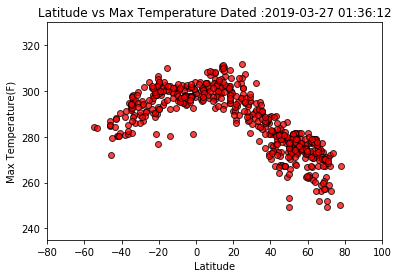

In [37]:
x_axis = df['Lat']
timestamp = df['Date'].max()
date = str(datetime.fromtimestamp(timestamp))
plt.scatter(x_axis, df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Max Temperature " + "Dated :" + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlim(-80,100)
plt.ylim(235,330)
plt.savefig("./MaxTemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

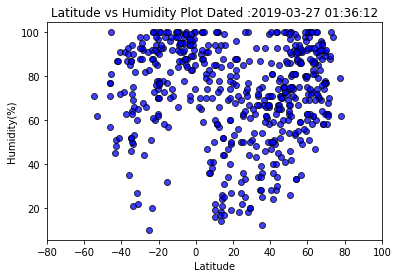

In [38]:
plt.scatter(x_axis, df['Humidity'], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity Plot " + "Dated :" + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.savefig("./HumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

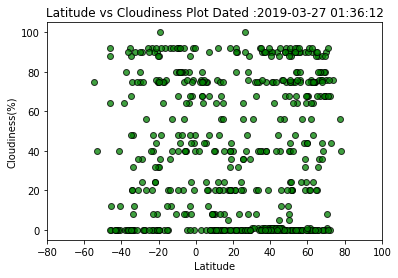

In [39]:
plt.scatter(x_axis, df['Cloudiness'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloudiness Plot " + "Dated :" + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.savefig("./CloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

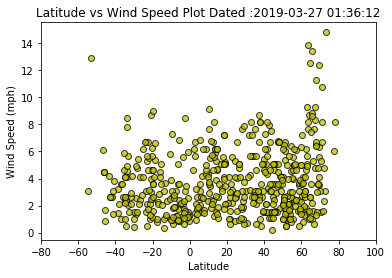

In [40]:
plt.scatter(x_axis, df['Wind Speed'], marker="o", facecolors="y", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed Plot " + "Dated :" + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.savefig("./WindSpeedPlot.png")
plt.show()